In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Read the CSV file with the appropriate encoding
data = pd.read_csv('final_data_30k_latest.csv', encoding='latin-1')

# Extract the input parameters and the target variable
X = data[['pH', 'Dissolved Oxygen (mg/L)', 'Water Temperature (Â°C)', 
          'Suspended solids (mg/L)', 'Conductivity (Î¼S/cm)']]
y = data['5-Day Biochemical Oxygen Demand (mg/L)']


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


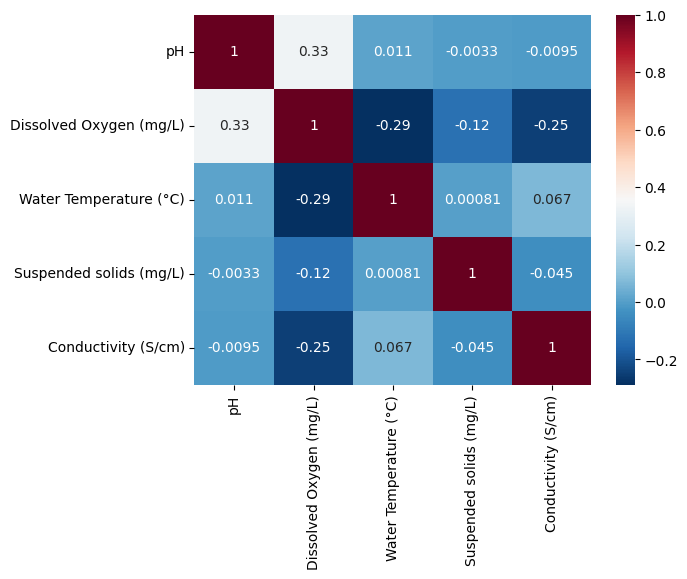

In [30]:
scaler = MinMaxScaler()
normalized_input_params = scaler.fit_transform(X)

In [31]:
normalized_input = pd.DataFrame(normalized_input_params, columns=X.columns)

In [32]:
normalized_input

,pH,Dissolved Oxygen (mg/L),Water Temperature (Â°C),Suspended solids (mg/L),Conductivity (Î¼S/cm)
0,0.569892,0.408654,0.392857,0.000513,0.259398
1,0.591398,0.490385,0.172078,0.001488,0.127422
2,0.591398,0.418269,0.503247,0.000138,0.032632
3,0.569892,0.384615,0.512987,0.000275,0.229944
4,0.591398,0.384615,0.561688,0.000650,0.182868
...,...,...,...,...,...
30211,0.462366,0.120192,0.694805,0.007113,0.004636
30212,0.440860,0.033654,0.798701,0.007738,0.006053
30213,0.440860,0.014423,0.649351,0.000613,0.012328
30214,0.430108,0.033654,0.568182,0.011113,0.041479


In [70]:
import numpy as np
from scipy import stats

# Define a z-score threshold for outlier detection
zscore_threshold = 3

# Compute the z-scores for input parameters
z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

# Remove outliers from input parameters
input_params_cleaned = X[(abs_z_scores < zscore_threshold).all(axis=1)]
target_variable_cleaned = X[(abs_z_scores < zscore_threshold).all(axis=1)]


In [71]:
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
X_train, X_test, y_train, y_test = train_test_split(input_params_cleaned, target_variable_cleaned, test_size=0.2, random_state=42)

In [73]:
input_params_cleaned.shape

(28481, 5)

In [74]:
# Create the neural network model
num_input_features = normalized_input.shape[1]
model = keras.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(num_input_features,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               768       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,137
Trainable params: 11,137
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
712/712 [==============================] - 4s 4ms/step - loss: 10916197.0000 - mae: 1154.8501 - val_loss: 10536228.0000 - val_mae: 1128.6879
Epoch 2/100
712/712 [==============================] - 2s 3ms/step - loss: 10886216.0000 - mae: 1156.9844 - val_loss: 10536228.0000 - val_mae: 1128.5276
Epoch 3/100
712/712 [==============================] - 3s 4ms/step - loss: 10886199.0000 - mae: 1157.0378 - val_loss: 10536228.0000 - val_mae: 1128.6340
Epoch 4/100
712/712 [==============================] - 2s 3ms/step - loss: 10886209.0000 - mae: 1157.0500 - val_loss: 10536228.0000 - val_mae: 1128.5485
Epoch 5/100
712/712 [==============================] - 3s 5ms/step - loss: 10886214.0000 - mae: 1157.0277 - val_loss: 10536228.0000 - val_mae: 1128.6019
Epoch 6/100
712/712 [==============================] - 2s 3ms/step - loss: 10886205.0000 - mae: 1157.0480 - val_loss: 10536228.0000 - val_mae: 1128.7933
Epoch 7/100
712/712 [==============================] - 2s 3ms/step - loss: 1088644

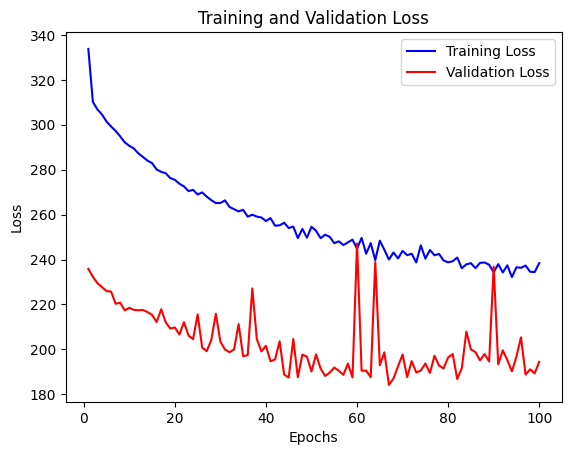

In [49]:
import matplotlib.pyplot as plt

# Get the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [50]:
loss, mae = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test MAE:', mae)

189/189 [==============================] - 1s 4ms/step - loss: 194.4710 - mae: 5.3274
Test Loss: 194.47100830078125
Test MAE: 5.327448844909668


189/189 [==============================] - 0s 2ms/step


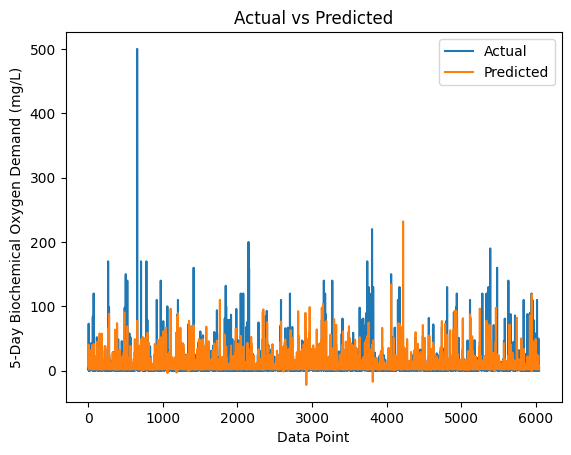

In [53]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('5-Day Biochemical Oxygen Demand (mg/L)')
plt.legend()
plt.show()


In [56]:
from sklearn.neighbors import KNeighborsRegressor
grnn = KNeighborsRegressor(weights='distance')
grnn.fit(X_train, y_train)

# Make predictions
y_pred = grnn.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 238.81293229294553
Root Mean Squared Error: 15.453573447359854
Mean Absolute Error: 5.741009175133219
R2 Score: 0.09904646597107913


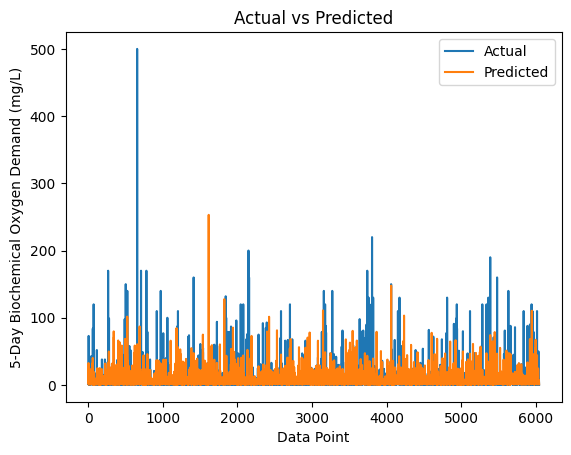

In [58]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = grnn.predict(X_test)

# Plot actual vs predicted values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('5-Day Biochemical Oxygen Demand (mg/L)')
plt.legend()
plt.show()

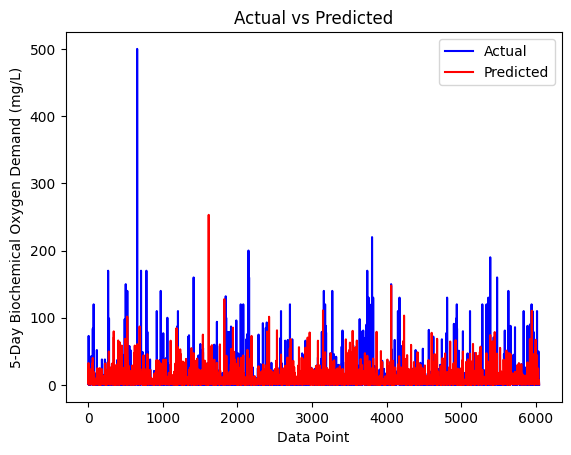

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Generate an array for the data points
data_points = np.arange(len(y_test))

# Plot actual vs predicted values
plt.plot(data_points, y_test.values, 'b', label='Actual')
plt.plot(data_points, y_pred, 'r', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('5-Day Biochemical Oxygen Demand (mg/L)')
plt.legend()
plt.show()


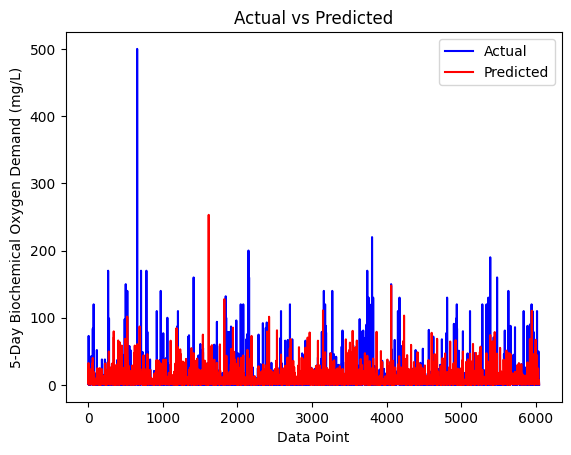

In [64]:
import matplotlib.pyplot as plt

# Generate an array for the data points
data_points = range(len(y_test))

# Plot actual vs predicted values
plt.plot(data_points, y_test.values, 'b-', label='Actual')
plt.plot(data_points, y_pred, 'r-', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point')
plt.ylabel('5-Day Biochemical Oxygen Demand (mg/L)')
plt.legend()
plt.show()
